In [3]:
import pandas
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from scipy import stats

In [4]:
dataset = pandas.read_csv("../data/reuse.csv")
#print(dataset.groupby('label').size())
#df4 = pandas.concat([df1, df]) 
#dataset = df4.drop_duplicates(keep='last')
dataset['success'] = dataset['success'].map({'success': 1, 'failure': 0})

In [6]:
len(dataset.columns)
print(dataset.groupby('success').size())
dataset

success
0.0     9
1.0    15
dtype: int64


,'Project,'Software,'Overall,'Type,'Software.1,'SP,'Application,'Type.1,'Size,'Development,...,'Work,'Domain,Origin,'Independent,'When,Qualification,'Configuration,'Rewards,'#,success
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,L,L,product-family,product,high,TLC,Technical,L,OO,...,D+C,yes,ex-novo,yes,before,yes,yes,no,51_to_100,1.0
2,B,L,L,product-family,product,high,TLC,Technical,M,OO,...,D+C,yes,ex-novo,yes,before,yes,yes,no,51_to_100,1.0
3,D,L,L,isolated,alone,middle,SE-Tools,Technical,M,OO,...,C,no,as-is,no,before,no,no,yes,21_to_50,0.0
4,E,L,L,isolated,alone,middle,TLC,Technical,M,OO,...,C,no,as-is,no,before,no,no,yes,21_to_50,0.0
5,F,L,L,isolated,alone,middle,TLC,Technical,M,OO,...,C,no,as-is,no,before,no,no,yes,21_to_50,0.0
6,G,L,X,product-family,process,low,Bank,Business,L,OO,...,C,no,reeng,no,justintime,yes,yes,no,51_to_100,1.0
7,H,M,M,product-family,product,high,Engine_Controller,Embedded-RT,L,OO,...,R+D+C,no,reeng,no,justintime,no,yes,no,51_to_100,1.0
8,I,M,X,product-family,product,middle,FMS,Technical,M,OO,...,D+C,no,reeng,no,justintime,no,no,no,51_to_100,0.0
9,J,M,X,product-family,product,middle,FMS,Technical,M,OO,...,D+C,no,reeng,no,justintime,no,no,no,51_to_100,0.0


In [13]:
seed = 7
array = dataset.values
X = array[:,0:27]
Y = array[:,27]
validation_size = 0.33
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [14]:
print(Y)

[nan 1.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0
 1.0 0.0 1.0 1.0 1.0 0.0 0.0]


In [8]:
#scoring = 'accuracy'.
scoring = 'roc_auc'

In [15]:
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#models.append(('RF', RandomForestClassifier()))
models.append
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ValueError: invalid literal for float(): 100+

In [10]:
print(0.673959 * 100)

67.3959


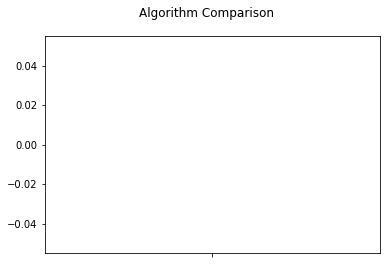

In [11]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
dtc = LogisticRegression()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

ValueError: invalid literal for float(): 100+

In [12]:
dtc = LinearDiscriminantAnalysis()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8152242577384713
[[2496  102]
 [ 483   85]]
             precision    recall  f1-score   support

        0.0       0.84      0.96      0.90      2598
        1.0       0.45      0.15      0.23       568

avg / total       0.77      0.82      0.77      3166



/Users/gesteves/sources/se-ml/venv/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [25]:
dtc = KNeighborsClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7921667719519899
[[2417  181]
 [ 477   91]]
             precision    recall  f1-score   support

        0.0       0.84      0.93      0.88      2598
        1.0       0.33      0.16      0.22       568

avg / total       0.75      0.79      0.76      3166



In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7593177511054959
[[2205  393]
 [ 369  199]]
             precision    recall  f1-score   support

        0.0       0.86      0.85      0.85      2598
        1.0       0.34      0.35      0.34       568

avg / total       0.76      0.76      0.76      3166



In [27]:
svn = GaussianNB()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.815540113708149
[[2467  131]
 [ 453  115]]
             precision    recall  f1-score   support

        0.0       0.84      0.95      0.89      2598
        1.0       0.47      0.20      0.28       568

avg / total       0.78      0.82      0.78      3166



In [28]:
svn = SVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8262792166771952
[[2595    3]
 [ 547   21]]
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.90      2598
        1.0       0.88      0.04      0.07       568

avg / total       0.83      0.83      0.75      3166



In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7921667719519899
[[2417  181]
 [ 477   91]]
             precision    recall  f1-score   support

        0.0       0.84      0.93      0.88      2598
        1.0       0.33      0.16      0.22       568

avg / total       0.75      0.79      0.76      3166



In [14]:
# Normalize z-value (all columns)
# Logistic Regression on the data
# Run xgboost (expect better results)
# Table with all algorithm
# Compare features (with xgboost x shap value)
# Write the paper